<a href="https://colab.research.google.com/github/nguyenanhtienabcd/AIO2024_EXERCISE/blob/feature%2FMODULE2-WEEK4/m02w04_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ex1: compute mean

In [ ]:
import numpy as np
def compute_mean(x):
    return np.mean(x)


In [ ]:
x = [2, 0, 2, 2, 7, 4, -2, 5, -1, -1]
print('mean:', compute_mean(x))

mean: 1.8


## ex2: compute median

In [ ]:
def compute_median(x):
    x.sort()
    if len(x) % 2 == 1:
      index = len(x) // 2
      return x[index]
    else:
      index = len(x) // 2
      return (x[index - 1] + x[index]) / 2

In [ ]:
x= [1, 5, 4, 4, 9, 13]
print(" Median : ", compute_median (x))

 Median :  4.5


## ex3: compute_standard

In [ ]:
def compute_std(data):
    """Compute the variance of a list of numbers."""
    mean = sum(data) / len(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std = variance ** 0.5
    return std

In [ ]:
X = [ 171 , 176 , 155 , 167 , 169 , 182]
print("Standard Deviation : ", compute_std(X))

Standard Deviation :  8.32666399786453


## ex4: correlation coeffection

In [ ]:
def compute_correlation_coefficient(x, y):
    """Compute the correlation coefficient of two lists of numbers."""
    x = np.array(x)
    y = np.array(y)
    mean_x = compute_mean(x)
    mean_y = compute_mean(y)
    std_x = compute_std(x)
    std_y = compute_std(y)
    correlation_coefficient = np.sum((x - mean_x) * (y - mean_y)) / (len(x) * std_x * std_y)
    return correlation_coefficient

In [ ]:
x = np.asarray([-2, -5, -11, 6, 4, 15, 9])
y = np.asarray([4 , 25, 121 , 36, 16, 225 , 81])
print("Correlation Coefficient : ", compute_correlation_coefficient(x, y))

Correlation Coefficient :  0.4202633309602727


## ex5: TABULAR DATA ANALYSIS

In [ ]:
! gdown 1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq

Downloading...
From: https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 13.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/advertising.csv')
x = np.array(data['TV'])
y = np.array(data['Radio'])
corr = compute_correlation_coefficient(x, y)
print("Correlation Coefficient : ",round(corr,2))


Correlation Coefficient :  0.05


## ex6: TABULAR DATA ANALYSIS

In [ ]:
data = pd.read_csv('/content/advertising.csv')
features = ['TV', 'Radio', 'Newspaper']
print(features)
for feature_1 in features :
  for feature_2 in features :
    correlation_value = compute_correlation_coefficient(data[feature_1], data[feature_2])
    print(f" Correlation between {feature_1} and {feature_2}: { round(correlation_value, 2)}")

['TV', 'Radio', 'Newspaper']
 Correlation between TV and TV: 1.0
 Correlation between TV and Radio: 0.05
 Correlation between TV and Newspaper: 0.06
 Correlation between Radio and TV: 0.05
 Correlation between Radio and Radio: 1.0
 Correlation between Radio and Newspaper: 0.35
 Correlation between Newspaper and TV: 0.06
 Correlation between Newspaper and Radio: 0.35
 Correlation between Newspaper and Newspaper: 1.0


## ex7:

In [ ]:
data = pd.read_csv('/content/advertising.csv')
x = data['Radio']
y = data['Newspaper']
result = np.corrcoef(x, y)
print(result)

[[1.         0.35410375]
 [0.35410375 1.        ]]


## ex8:

In [ ]:
data = pd.read_csv('/content/advertising.csv')
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## ex9:

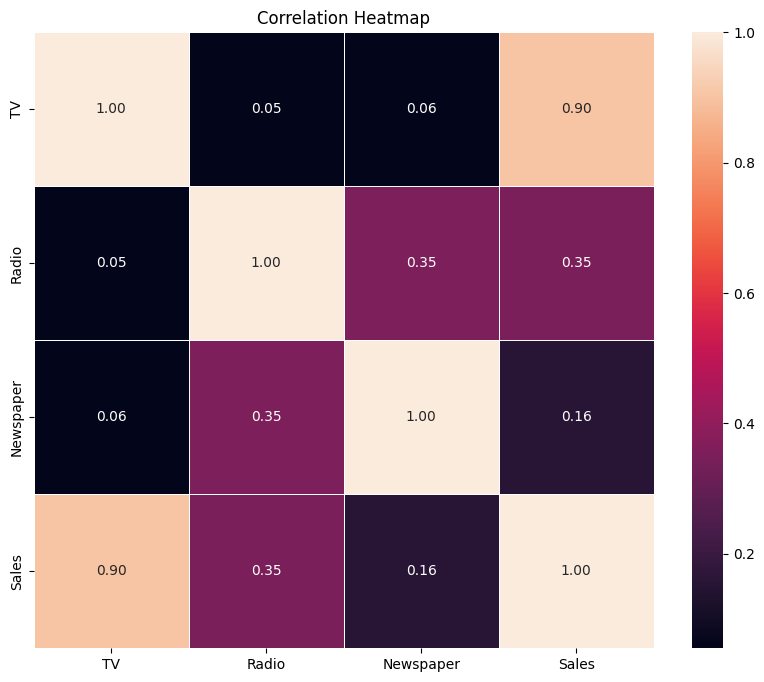

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv('/content/advertising.csv')
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt = '.2f', linewidth= .5)
plt.title('Correlation Heatmap')
plt.show()


## ex10:

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
! gdown 1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6

Downloading...
From: https://drive.google.com/uc?id=1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6
To: /content/vi_text_retrieval.csv
100% 201k/201k [00:00<00:00, 70.2MB/s]


In [5]:
vi_data_df = pd.read_csv('/content/vi_text_retrieval.csv')
context =  vi_data_df['text']
context = [doc.lower() for doc in context]
#print(context)
tf_idf_vectorizer = TfidfVectorizer()
#print(tf_idf_vectorizer)
context_embedded = tf_idf_vectorizer.fit_transform(context)
print(context_embedded.shape)
context_embedded.toarray()[7][0]
print(context_embedded.toarray()[7][0])
print(context_embedded.toarray())

(500, 2913)
0.31126580760710637
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## ex11: tf-idf search

In [11]:
def tfidf_search(question, context_embedded, tf_idf_vectorizer , top_d = 5):
  question = question.lower()
  query_embedded = tf_idf_vectorizer.transform([question])
  cosine_scores = cosine_similarity(context_embedded, query_embedded).reshape((-1,))
  # sẽ tạo ra một ma trận 500 hàng và 1 cột có chứa kết quả cosine
  # sau đó chuyển thành ma trận 1 hàng và 500 cột
   # Get top k cosine scores and index its
  results = []
  #cosine_scores.argsort()[-top_d:][::-1] lấy 5 phần tử cuối cùng đã được sort, lấy theo chiều giảm dần
  for idx in cosine_scores.argsort()[-top_d:][::-1]:
      doc_score = {
          'id': idx,
          'cosine_score': cosine_scores[idx]
      }
      results.append(doc_score)

  return results

context_embedded = tf_idf_vectorizer.fit_transform(context)
question = vi_data_df.iloc[0]['question']
results = tfidf_search(question, context_embedded, tf_idf_vectorizer, top_d=5)
print(results[0]['cosine_score'])

0.6279910475266974


## ex12: tf-idf search

In [24]:
question = vi_data_df.iloc[0]['question']
question = question.lower()
query_embedded = tf_idf_vectorizer.transform([question])
print(query_embedded.shape)
print(query_embedded.toarray())
print(query_embedded.toarray()[0])
print(context_embedded.toarray())
correlation = np.corrcoef(
      query_embedded.toarray()[0],
      context_embedded.toarray()
      )
print(correlation)

(1, 2913)
[[0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 1.00000000e+00  6.25959975e-01 -4.77247139e-03 ... -2.13656571e-03
   2.22206998e-02  2.24454295e-03]
 [ 6.25959975e-01  1.00000000e+00 -1.74572809e-03 ... -7.25634316e-04
   2.27200306e-02  1.51604979e-03]
 [-4.77247139e-03 -1.74572809e-03  1.00000000e+00 ... -3.90803952e-03
   2.18249469e-02 -5.55317280e-03]
 ...
 [-2.13656571e-03 -7.25634316e-04 -3.90803952e-03 ...  1.00000000e+00
   1.56538410e-02  2.23320475e-03]
 [ 2.22206998e-02  2.27200306e-02  2.18249469e-02 ...  1.56538410e-02
   1.00000000e+00  3.42478801e-02]
 [ 2.24454295e-03  1.51604979e-03 -5.55317280e-03 ...  2.23320475e-03
   3.42478801e-02  1.00000000e+00]]


In [28]:
def tfidf_corr_search(question, context_embedded, tf_idf_vectorizer , top_d = 5):
  question = question.lower()
  query_embedded = tf_idf_vectorizer.transform([question])
  # bởi vì numpy sử dụng với mảng nên phải sử dụng đến to array
  correlation = np.corrcoef(
      query_embedded.toarray()[0],
      context_embedded.toarray()
      )
  # lúc này ma trận corrlation sẽ là ma trận (n+1, n+1)
  # với n là số hàng của ma trận context_embedded.toarray()
   # Get top k cosine scores and index its
  correlation = correlation[0][1:]
  results = []
  for idx in correlation.argsort()[-top_d:][::-1]:
      doc_score = {
          'id': idx,
          'correlation': correlation[idx]
      }
      results.append(doc_score)

  return results

context_embedded = tf_idf_vectorizer.fit_transform(context)
question = vi_data_df.iloc[0]['question']
results = tfidf_corr_search(question, context_embedded, tf_idf_vectorizer, top_d=5)
print(results[1]['correlation'])

0.20734246471973258
